# Простая линейная регрессия. Градиентный спуск

Простая линейная регрессия моделирует связь между величиной одной переменной и величиной второй. Например, по мере увеличения $X$ увеличивается и $Y$ или же наоборот уменьшается. Рассмотрим на примере предсказания прибыли от продовольственных перевозок. Допустим, есть данные прибыли от перевозок еды в рестораны некоторых городов с известной численностью населения.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
headers = ['population', 'profit']
df = pd.read_csv('ex1data1.csv', names=headers)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Визуализация данных

In [3]:
x = df.population
y = df.profit

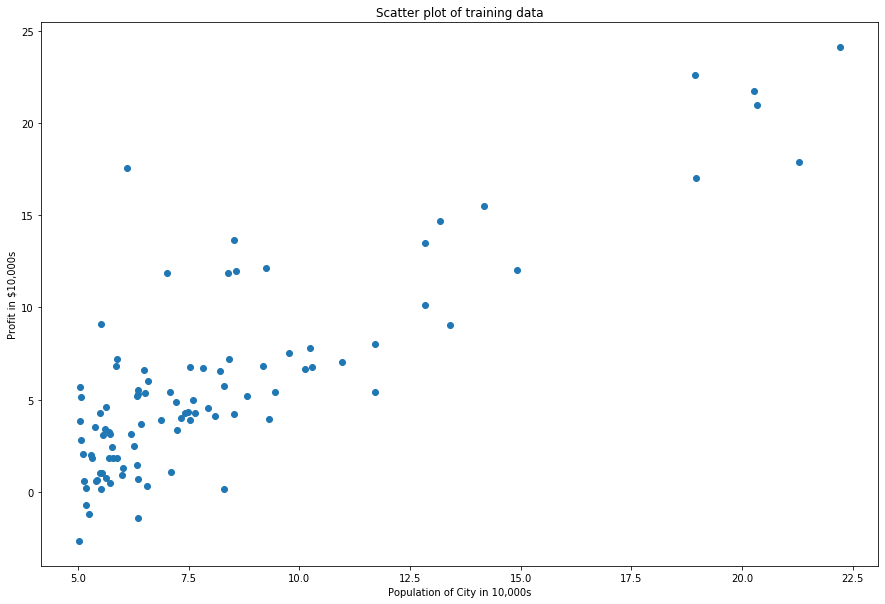

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter plot of training data')
plt.show()

## Модель линейной регрессии

Простая линейная регрессия оценивает, насколько именно изменится $y$, когда $x$ изменится на определенную величину. Для коэффициента корреляции переменные взаимозаменяемы, о чем говорит симметричность корреляционной матрицы. В случае же с регрессией мы пытаемся предсказать переменную $y$ из переменной $x$, используя линейное соотношение
$$ y = \theta_0 + \theta_1 x, $$
где $\theta_0$ называется _пересечением_, а $\theta_1$ — _наклоном_ для $x$. Переменная $y$ называется _откликом_, _целью_ или _зависимой_ переменной, а $x$ называется _предиктором_, _вектором признаков_ или _независимой_ переменной.

Поскольку уравнение регрессии задано линейным соотношением, то и в результате мы получим прямую. Как правило она не проходит точно через все имеющиеся данные, поэтому уравнение регрессии должно включать в себя заданный в явной форме остаточный член $e$, который является случайной величиной:
$$ y = \theta_0 + \theta_1 x + e.$$
_Подогнанные_, или _предсказанные_, значения задаются следующей формулой:
$$ \hat{y} = \theta_0 + \theta_1 x.$$
Форма записи коэффициентов регрессии (с шляпой) говорит о том, что они оценочные (расчетные) в отличие от точных.

In [5]:
def predict(theta, x):
    return theta[0] + theta[1] * x


def error(theta, x, y):
    return y - predict(theta, x)

## Метод максимального правдоподобия

Пусть имеется выборка данных $v_1, \dots, v_n$, которая порождается распределением, зависящим от некоторого неизвестного параметра $\varphi$:
$$ p(v_1, \dots, v_n | \varphi). $$
Если параметр $\varphi$ неизвестен, то можно поменять члены местами, чтобы представить эту величину, как _правдоподобие_ параметра $\varphi$ при наличии выборки:
$$ L(\varphi | v_1, \dots, v_n). $$
Согласно такому подходу наиболее правдоподобным значением $\varphi$ является то, которое максимизирует эту функцию правдоподобия, т. е. значение, которое делает наблюдаемые данные наиболее вероятными.

Одно из допущений, которое нередко принимается относительно модели простой линейной регрессии, заключается в том, что случайные ошибки регрессии нормально распределены с нулевым средним и неким (известным) стандартным отклонением $\sigma$. В этом случае правдоподобие на основе наблюдаемой пары $(x_i, y_i)$ равно:
$$ L\left(\theta_0, \theta_1 | x_i, y_i, \sigma \right) = \dfrac{1}{\sqrt{2 \pi \sigma}} \exp{\dfrac{-\left( y_i - \theta_0 - \theta_1 x_i \right)^2}{2 \sigma^2}}. $$
Правдоподобие на основе всего набора данных является произведением индивидуальных правдоподобий:
$$ L\left( \theta_0, \theta_1 | x, y, \sigma \right) = \prod\limits_{i = 1}^{n} L\left( \theta_0, \theta_1 | x_i, y_i, \sigma \right) = \dfrac{1}{\left(2\pi\sigma\right)^{n / 2}}  \exp{\dfrac{- \sum\limits_{i = 1}^n \left( y_i - \theta_0 - \theta_1 x_i \right)^2}{2 \sigma^2}}. $$
Такая функция правдоподобия максимальна тогда, когда минимальна _сумма квадратов случайных ошибок_, или _остаточная сумма квадратов (RSS)_, или _функция потерь_. Таким образом, мы приходим к методу наименьших квадратов.

## Метод наименьших квадратов

Итак, прямая регрессии является оценкой, которая минимизирует функцию потерь:
$$ RSS(\theta) = \sum\limits_{i = 1}^{n} \left( y_i - \hat{y_i} \right)^2 = \sum\limits_{i = 1}^{n} \left( y_i - \theta_0 - \theta_1 x_i \right)^2, $$
где $\theta = \left(\theta_0, \theta_1 \right)$ — это вектор значений, которые минимизируют $RSS$.

Для удобства сумму в $RSS$ часто домножают константой $\dfrac{1}{2n}$:
$$ RSS(\theta) = \dfrac{1}{2n} \sum\limits_{i = 1}^{n} \left( y_i - \theta_0 - \theta_1 x_i \right)^2. $$

## Градиентный спуск

Метод градиентного спуска является численным методом оптимизации и позволяет найти такие значения вектора $\theta$, чтобы они минимизировали функцию $RSS$. Для таких функций градиент (вектор частных производных) задает для входящего аргумента направление наибыстрейшего возрастания функции. Поэтому один из подходов к минимизации функции состоит в том, чтобы выбрать произвольную точку, вычислить градиент, сделать малый шаг в противоположном направлении (или в направлении антиградиента) и повторить итерацию с новой отправной точки. 

Таким образом, каждая итерация градиентного спуска для простой линейной регрессии соответствует формулам:

$$ \theta_0 = \theta_0 - \alpha \dfrac{\partial RSS}{\partial \theta_0} = \theta_0 + \alpha \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left( y_i - \theta_0 - \theta_1 x_i \right), $$
$$ \theta_1 = \theta_1 - \alpha \dfrac{\partial RSS}{\partial \theta_1} = \theta_1 + \alpha \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left( y_i - \theta_0 - \theta_1 x_i \right) x_i, $$
где $\alpha$ — шаг, или параметр _скорости обучения_. Наиболее популярные варианты выбора шага:
- применение постоянного размера шага;
- постепенное дробление шага во времени;
- на каждом шаге выбор размера шага, который минимизирует значение целевой функции (метод наискорейшего спуска).

## Вычисление функции потерь

Функция `computeCost()` будет вычислять значение функции потерь, чтобы отслеживать сходимость градиентного спуска.

In [6]:
def computeCost(x, y, theta):
    n = len(y)
    return 1 / (2 * n) * np.sum(error(theta, x, y) ** 2)


def computeCostGradient(x, y, theta):
    n = len(y)
    return [- np.sum(error(theta, x, y)) / n, - np.sum(error(theta, x, y) * x) / n]

In [7]:
random.seed(0)
theta = [random.random(), random.random()]
alpha = 0.01

In [8]:
theta

[0.8444218515250481, 0.7579544029403025]

In [9]:
computeCost(x, y, theta)

6.587892928192853

In [19]:
gradient = computeCostGradient(x, y, theta)
gradient

[1.1900431370909368, 3.2619405571998024]

In [20]:
theta1 = step(theta, gradient, -alpha)
theta1

[0.8325214201541388, 0.7253349973683044]

In [24]:
computeCost(x, y, theta1)

6.513874601959945

In [15]:
computeCostGradient(x, y, theta)

[1.1900431370909368, 3.2619405571998024]

## Градиентный спуск

Функция `step()` выполняет шаг градиента. Функция `minimize_batch()` выполняет градиентный спуск до тех пор, пока не достигнет сходимости.

In [16]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]


def minimize_batch(target_fn, gradient_fn, x, y, theta_0, alpha, tolerance=0.000001):
    theta = theta_0
    value = target_fn(x, y, theta)
    RSS_history = list()
    
    while True:
        RSS_history.append(value)
        gradient = gradient_fn(x, y, theta)
        next_theta = step(theta, gradient, -alpha)
        next_value = target_fn(x, y, next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta, RSS_history
        else:
            theta, value = next_theta, next_value

Эта функция названа пакетной минимизацией, потому что на каждом шаге итерации она пересматривает весь набор данных целиком.

In [21]:
theta, RSS = minimize_batch(computeCost, computeCostGradient, x, y, theta, alpha)

В результате выполнения градиентного спуска получили следующие значения коэффициентов регрессии.

In [22]:
print(f'theta_0 = {theta[0]},\ntheta_1 = {theta[1]}')

theta_0 = -3.8406256844007247,
theta_1 = 1.1874927067028438


Посмотрим на поведение функции потерь. На каждой итерации градиентного спуска значение функции потерь уменьшается, что и требуется.

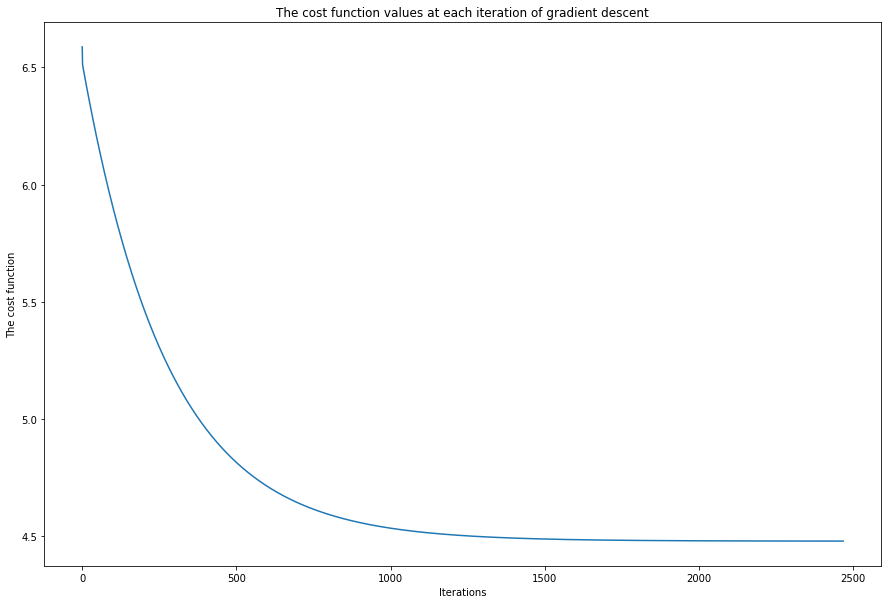

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(RSS)), RSS)
plt.xlabel('Iterations')
plt.ylabel('The cost function')
plt.title('The cost function values at each iteration of gradient descent')
plt.show()

Ещё интереснее посмотреть на поведение функции потерь в зависимости от значений $\theta_0$ и $\theta_1$.

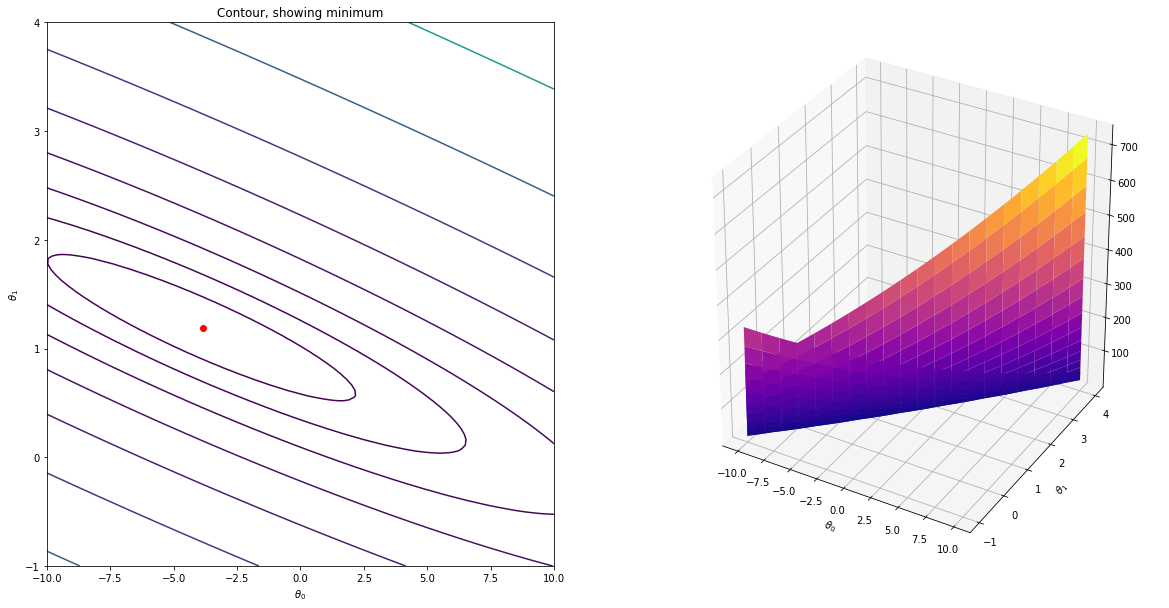

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
RSS_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        RSS_vals[i, j] = computeCost(x, y, t)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)

ax.contour(theta0_vals, theta1_vals, RSS_vals.T, np.logspace(-2, 3, 20))
ax.scatter(*theta, color='red')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_title('Contour, showing minimum')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, RSS_vals.T, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

Получив значения коэффициентов регрессии, минимизирующие функцию потерь, мы можем теперь предсказать прибыль от продовольственных перевозок в зависимости от численности населения города. Посмотрим, какая ожидается прибыль от городов с населением 35000 и 70000 человек.

In [13]:
profit_35k = round(predict(theta, 3.5) * 10000)
profit_70k = round(predict(theta, 7) * 10000)

print(f'For population of 35,000 people we predict a profit of {profit_35k}$.\nFor population of 70,000 people we predict a profit of {profit_70k}$.')

For population of 35,000 people we predict a profit of 3156.0$.
For population of 70,000 people we predict a profit of 44718.0$.


Следующий график показывает, что прямая линейной регрессии хорошо описывает наши данные. Видно, что между прибылью и численностью населения существует положительная зависимость.

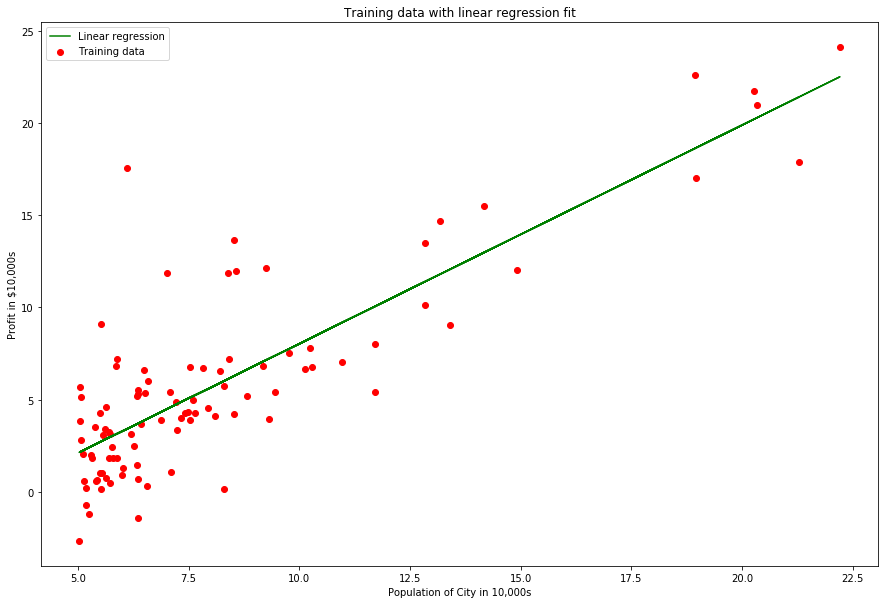

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='red')
plt.plot(x, predict(theta, x), color='green')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Linear regression', 'Training data'])
plt.title('Training data with linear regression fit')
plt.show()

# Список использованных источников

1. Материалы курса Machine Learning - Andrew Ng, Stanford University on Coursera.
2. Грас Дж. Data Science. Наука о данных с нуля: Пер. с англ. — СПб.: БХВ-Петербург, 2019. — 336 с.: ил.
3. Брюс, П. Практическая статистика для специалистов Data Science: Пер. с англ. / П. Брюс, Э Брюс. — СПб.: БХВ-Петербург, 2019. — 304 с.: ил.
4. Кибзун А. И., Горяинова Е. Р., Наумов А. В. Теория вероятностей и математическая статистика. Базовый курс с примерами и задачами: Учебник. — 3-е изд., перераб. и доп. — М.: ФИЗМАТЛИТ, 2013. — 232 с.
5. http://www.machinelearning.ru/wiki/images/f/fc/MOTP14_3.pdf